# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [126]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key


from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [127]:

lat_lngs = []


cities = []


lat_range = (-90, 90)
lng_range = (-180, 180)


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
  
    if city not in cities:
        cities.append(city)


print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [128]:
import requests


url = "http://api.openweathermap.org/data/2.5/weather"


city_data = []


print("Beginning Data Retrieval")
print("-----------------------------")


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

   
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    
    record_count += 1

    
    try:
        
        response = requests.get(city_url)
        city_weather = response.json()

        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except Exception as e:
        print(f"City not found. Skipping...")
pass 

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cooper's town
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | flat river
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | guozhen
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | newman
Processing Record 11 of Set 1 | las palmas de gran canaria
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | laayoune plage
City not found. Skipping...
Processing Record 20 of Set 1 | olonkinbyen
Process

In [129]:

city_data_df = pd.DataFrame(city_data)


city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [130]:

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cooper's town,26.8667,-77.5167,68.86,65,2,16.28,BS,1707878126
1,puerto natales,-51.7236,-72.4875,50.34,99,100,1.23,CL,1707878127
2,adamstown,-25.0660,-130.1015,77.02,85,100,14.97,PN,1707877880
3,keflavik,64.0049,-22.5624,27.03,86,0,4.61,IS,1707878127
4,flat river,37.8501,-90.5168,48.85,49,0,5.75,US,1707878127


In [131]:

import csv
city_data_df.to_csv('output_data', index_label="City_ID")



In [132]:

import csv
city_data_df = pd.read_csv("output_data", index_col="City_ID")


city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cooper's town,26.8667,-77.5167,68.86,65,2,16.28,BS,1707878126
1,puerto natales,-51.7236,-72.4875,50.34,99,100,1.23,CL,1707878127
2,adamstown,-25.0660,-130.1015,77.02,85,100,14.97,PN,1707877880
3,keflavik,64.0049,-22.5624,27.03,86,0,4.61,IS,1707878127
4,flat river,37.8501,-90.5168,48.85,49,0,5.75,US,1707878127


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

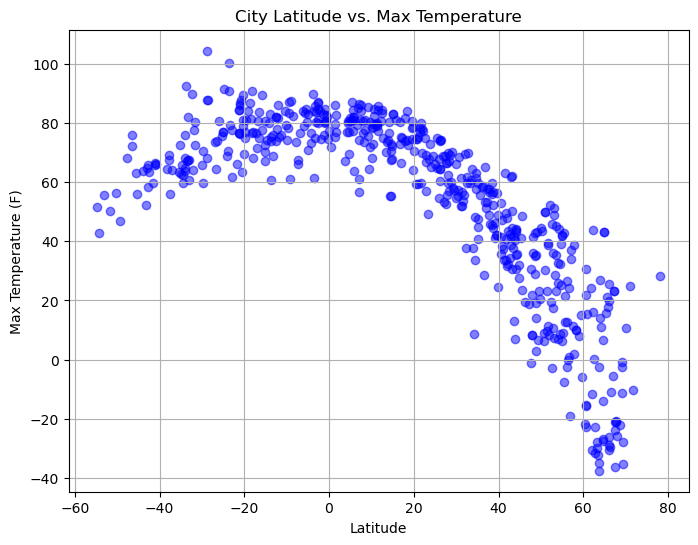

In [133]:

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", alpha=0.5)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.savefig("output_data2")


plt.show()


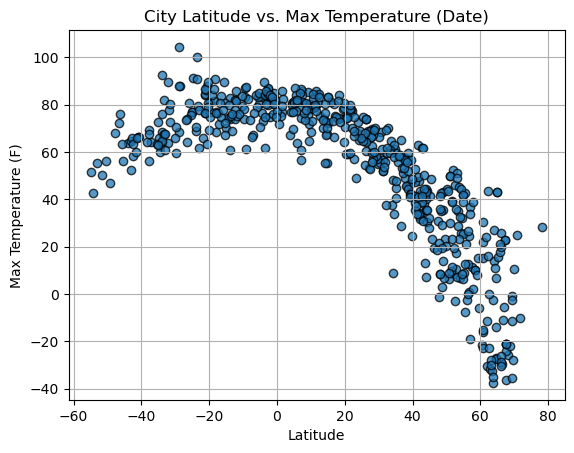

In [134]:

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)


plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.savefig("output_data1")


plt.show()


#### Latitude Vs. Humidity

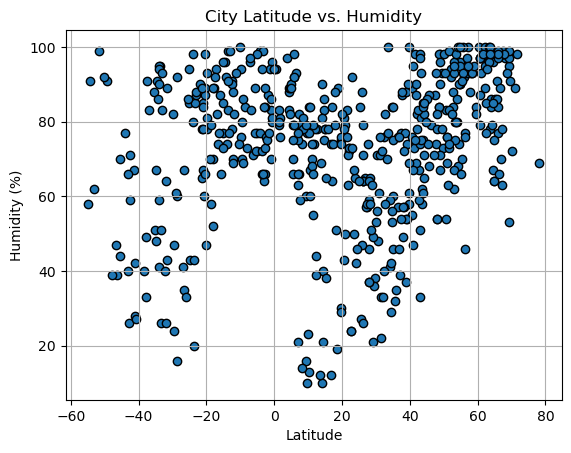

In [135]:



plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


plt.grid(True)


plt.savefig("output_data3")


plt.show()


#### Latitude Vs. Cloudiness

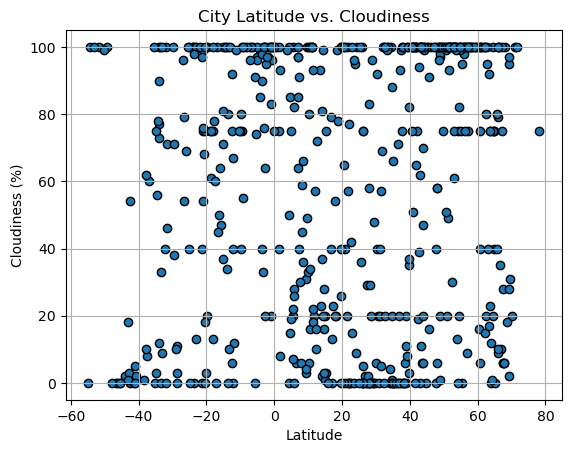

In [136]:
import matplotlib.pyplot as plt


plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')


plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


plt.grid(True)


plt.savefig("output_data4")


plt.show()


#### Latitude vs. Wind Speed Plot

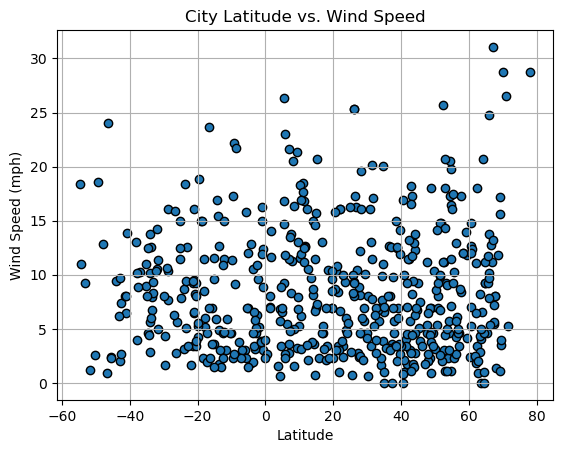

In [137]:



plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')


plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


plt.grid(True)


plt.savefig("output_data5")


plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


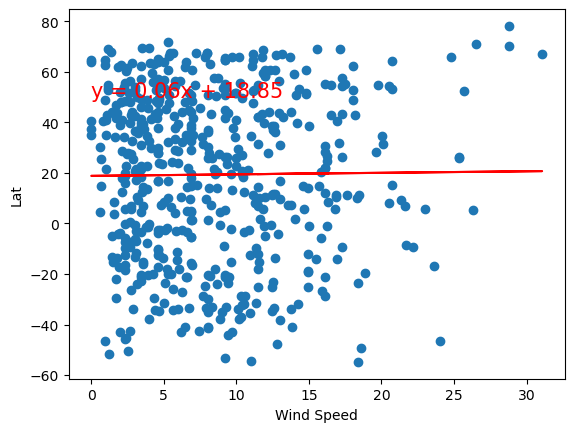

The r-squared is: 0.00011254055335409351


In [138]:

from scipy.stats import linregress


x_values = city_data_df['Wind Speed']
y_values = city_data_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")

    

In [139]:


northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cooper's town,26.8667,-77.5167,68.86,65,2,16.28,BS,1707878126
3,keflavik,64.0049,-22.5624,27.03,86,0,4.61,IS,1707878127
4,flat river,37.8501,-90.5168,48.85,49,0,5.75,US,1707878127
5,iqaluit,63.7506,-68.5145,-2.47,78,75,0.00,CA,1707878128
6,longyearbyen,78.2186,15.6401,28.24,69,75,28.77,SJ,1707878128


In [140]:

southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]


southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,50.34,99,100,1.23,CL,1707878127
2,adamstown,-25.0660,-130.1015,77.02,85,100,14.97,PN,1707877880
8,papatowai,-46.5619,169.4708,72.12,47,0,0.92,NZ,1707878129
12,port-aux-francais,-49.3500,70.2167,46.85,91,100,18.59,TF,1707878130
13,edinburgh of the seven seas,-37.0676,-12.3116,64.26,83,60,10.29,SH,1707878130


###  Temperature vs. Latitude Linear Regression Plot

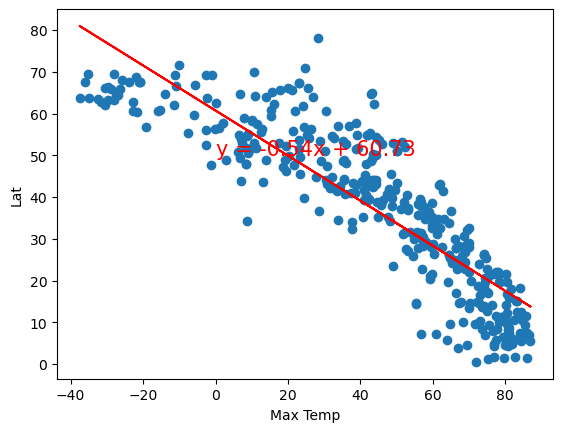

The r-squared is: 0.7669504688877314


In [141]:

x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")


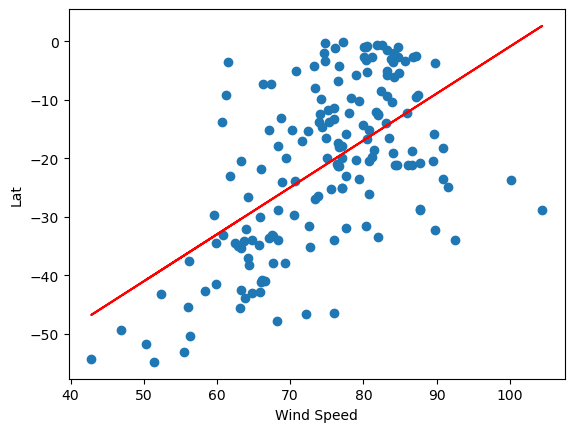

The r-squared is: 0.3398849869727595


In [142]:

x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

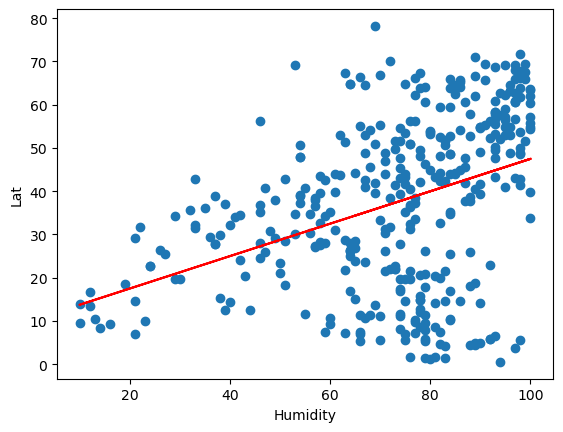

The r-squared is: 0.15376502942866133


In [143]:

x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")


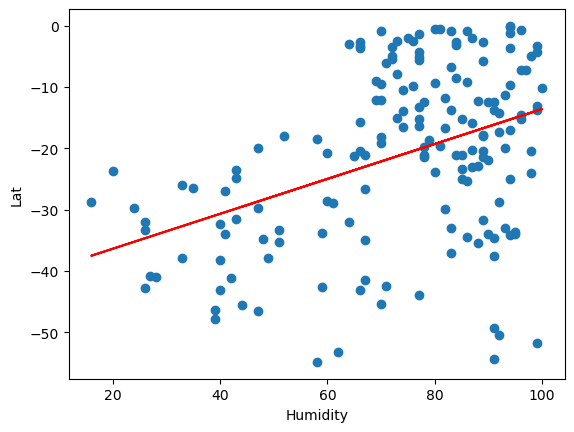

The r-squared is: 0.16449754110476705


In [144]:

x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

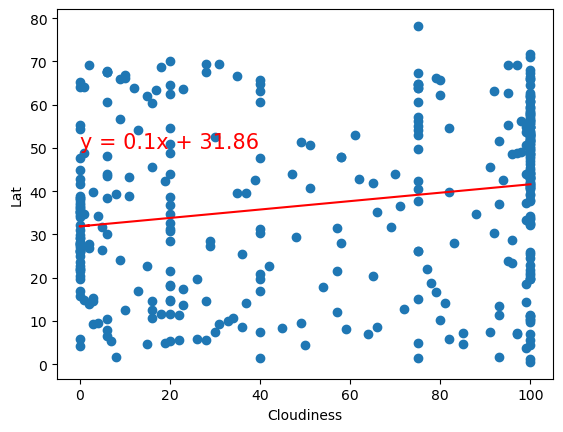

The r-squared is: 0.04093010203508352


In [145]:

x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")

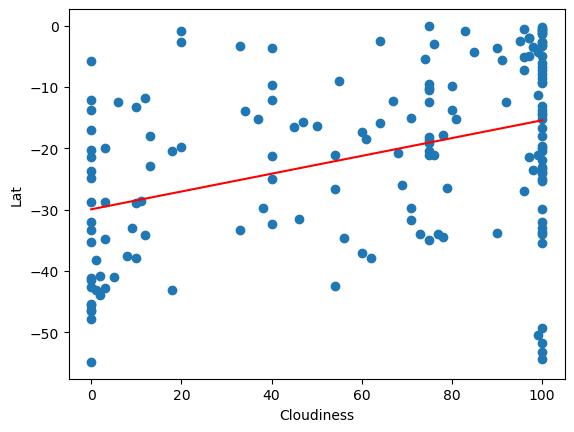

The r-squared is: 0.15866635621910433


In [146]:

x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

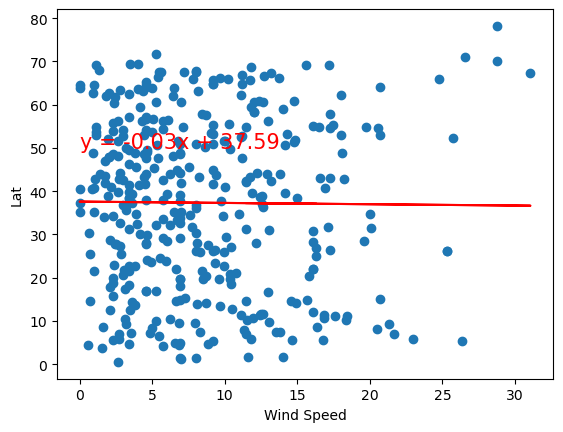

The r-squared is: 8.341392494606537e-05


In [147]:

x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")





    

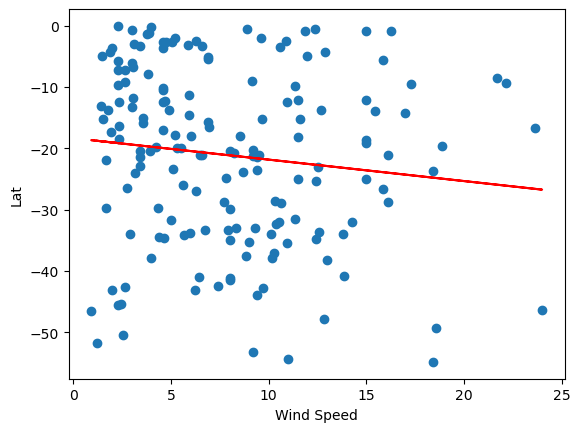

The r-squared is: 0.015523221573305893


In [148]:

x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()  
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE